# Skull Stripping of Brain MRI Images

In [10]:
from nipype.interfaces import fsl
from nilearn import image
from nilearn import plotting
import time
import warnings
warnings.filterwarnings("ignore")

### Skull stripping module

In [11]:
start_time = time.time()

input_directory = './'  
input_file_name = 'input'
input_          = input_directory + input_file_name + '.nii'

output_directory = './Stripped_Brain_Image/'
output_file_name = input_file_name  + '_stripped.nii'
output_          = output_directory + output_file_name

btr                    = fsl.BET()
btr.inputs.in_file     = input_        # un-stripped input MRI image file name
btr.inputs.frac        = 0.1
btr.inputs.out_file    = output_      # stripped input MRI image file name
btr.inputs.reduce_bias = True 
res                    = btr.run()

print('duration of one skull stripping in seconds:', str(time.time() - start_time ))

('duration of one skull stripping in seconds:', '398.507728815')


### Plotting module
#### Visualizing in - ‘sagittal’, ‘coronal’ and ‘axial’ for a certain cut-coordinates 

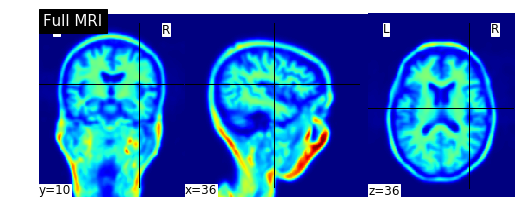

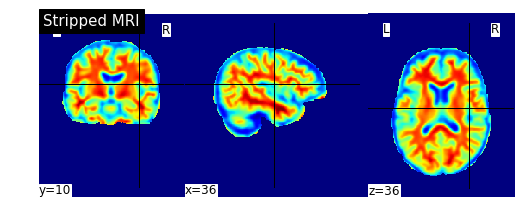

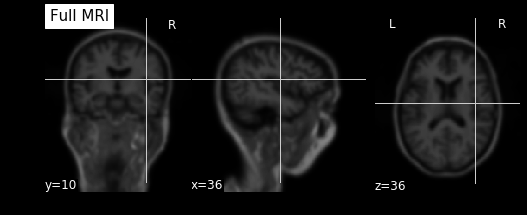

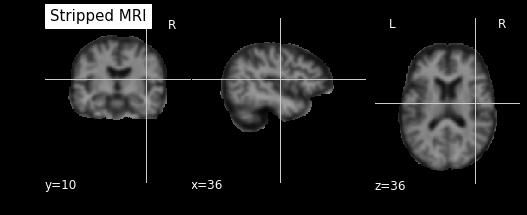

In [36]:
# Importing images
Full_MRI     = image.load_img(input_) 
Stripped_MRI = image.load_img(output_ + '.gz') 

# Plotting images
plotting.plot_img (Full_MRI , cut_coords = [36, 10, 36], 
                   title = "Full MRI").savefig(output_directory + 'Full MRI.png')

plotting.plot_img (Stripped_MRI, cut_coords = [36, 10, 36], 
                   title = "Stripped MRI").savefig(output_directory + 'Stripped MRI.png')

plotting.plot_anat(Full_MRI , cut_coords = [36, 10, 36], 
                   title = "Full MRI").savefig(output_directory + 'Full MRI 2.png')

plotting.plot_anat(Stripped_MRI, cut_coords = [36, 10, 36], 
                   title = "Stripped MRI").savefig(output_directory + 'Stripped MRI 2.png')

plotting.show()